In [4]:
import numpy as np
import geomstats
from geomstats.geometry.hypersphere import Hypersphere

In [37]:
dimension = 3

sphere = Hypersphere(dim=dimension - 1)


def random_tangent_vector(x, epsilon, n):
    
    v = np.random.randn(n)
    v -= v.dot(x) * x
    v /= np.linalg.norm(v)
    return v * epsilon

def retraction(x, v):
    return (x + v) / np.linalg.norm(x + v)

def retraction_based_random_walk(N, epsilon, n, x0):
    x_current = x0
    walk = [x_current]
    
    for i in range(N):
        v_tilde = random_tangent_vector(x_current, epsilon, n)
        v = np.sqrt(n) * v_tilde 
        x_current = retraction(x_current, v)  
        walk.append(x_current)
    
    return walk


N = 100
epsilon = 0.05
n = dimension
x0 = sphere.random_uniform(n_samples = 1)


rw_2_sphere = retraction_based_random_walk(N, epsilon, n, x0)

[array([-0.40744365,  0.1408196 , -0.90230788]), array([-0.41255086,  0.05489293, -0.90927914])]


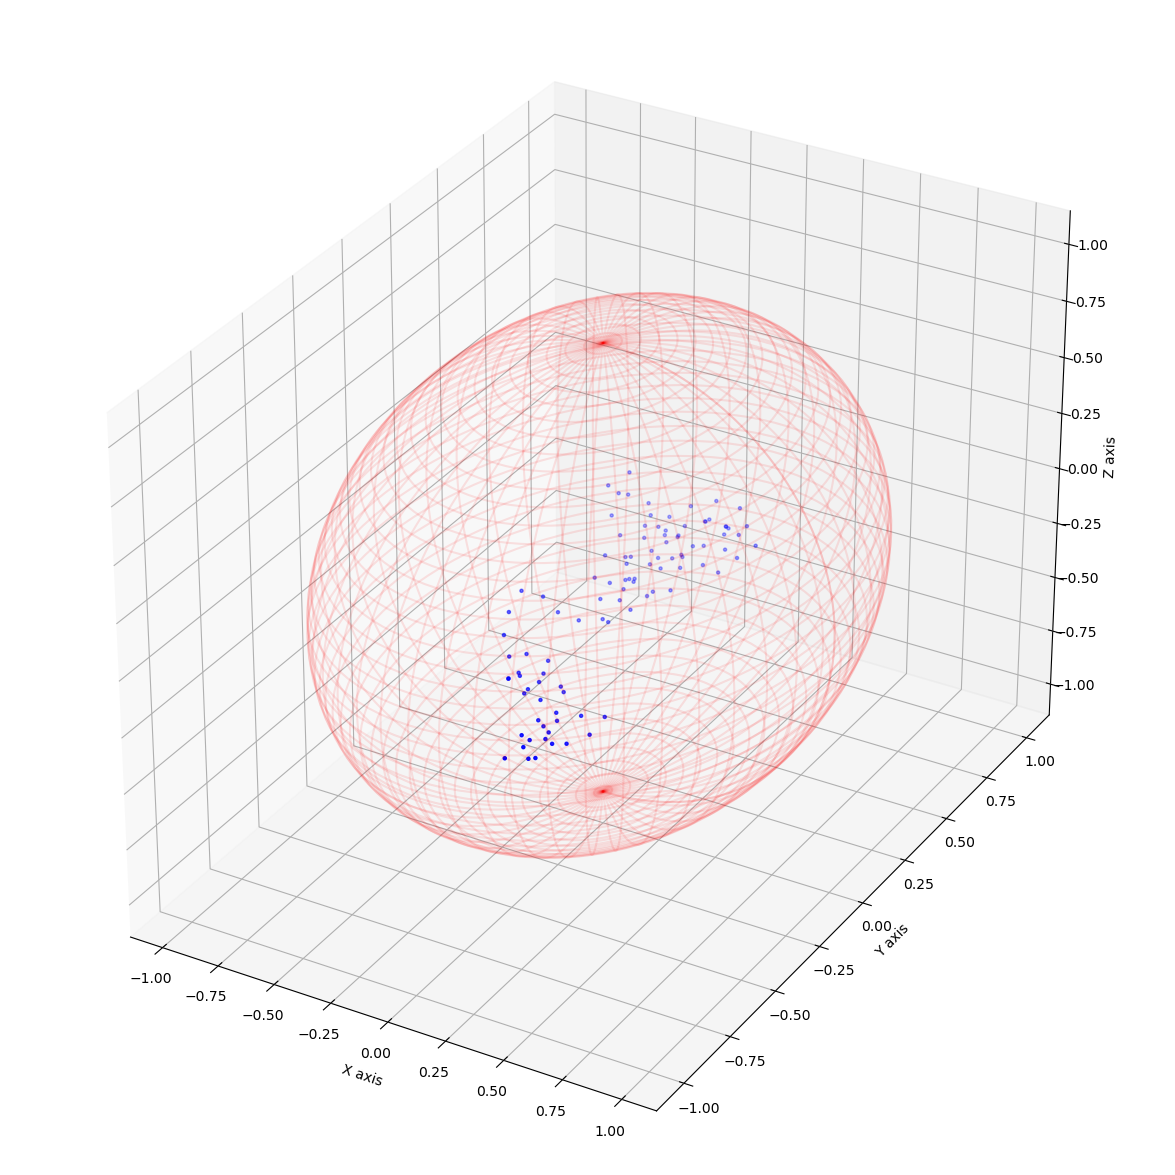

None


In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_graph(rw):
    walk = np.array(rw)
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(walk[:, 0], walk[:, 1], walk[:, 2], c='blue', marker='.')
    phi = np.linspace(0, np.pi, 100)
    theta = np.linspace(0, 2 * np.pi, 100)
    phi, theta = np.meshgrid(phi, theta)
    x = np.sin(phi) * np.cos(theta)
    y = np.sin(phi) * np.sin(theta)
    z = np.cos(phi)
    ax.plot_wireframe(x, y, z, color='r', alpha=0.1)
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_box_aspect([np.ptp(i) for i in [walk[:, 0], walk[:, 1], walk[:, 2]]])
    return plt.show()


print(rw_2_sphere[:2])
print(plot_graph(rw_2_sphere))

[array([ 0.59784575, -0.36925275,  0.19050318, -0.68552272]), array([ 0.52042439, -0.38636993,  0.17004473, -0.74226782])]


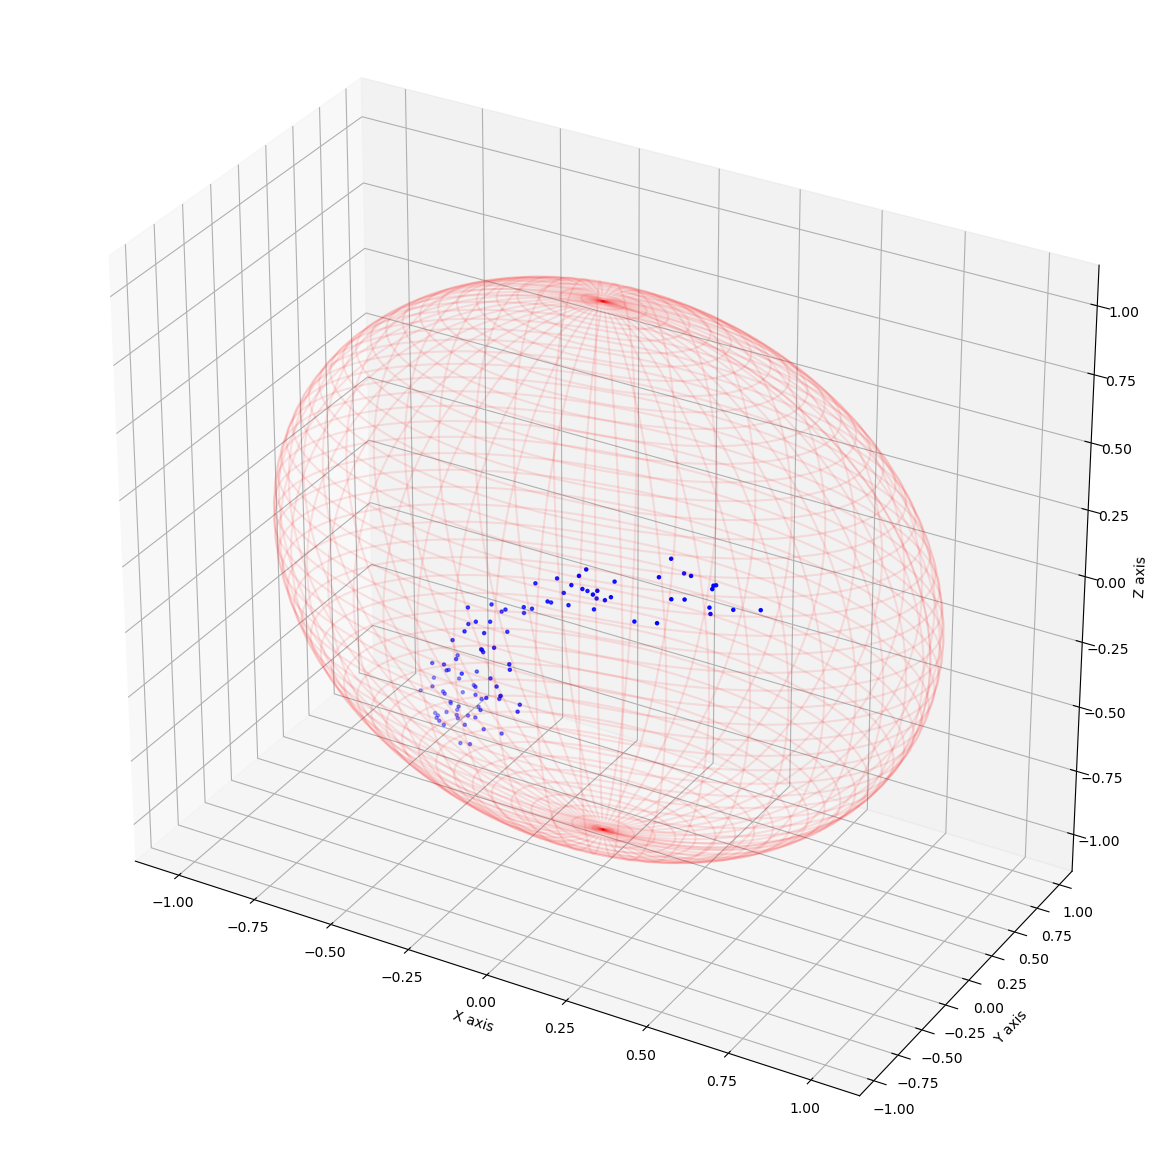

None


In [49]:
sphere = Hypersphere(dim=3)

rw_3_sphere = retraction_based_random_walk(100, 0.05, 4, sphere.random_uniform(n_samples = 1))
print(rw_3_sphere[:2])
print(plot_graph(rw_3_sphere))